# Numerical Checking of t-SNE algorithm [$\mathcal{O}(n^2)$ version]

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import struct
import os

In [30]:
def read_results(file_name, double=True):
    """ Read results file
    """
    sizeof = 8 if double else 4
    str_type = "{}d" if double else "{}f"
    
    with open(file_name, 'rb') as fil:
        N, D = struct.unpack('II', fil.read(8))
        print("N={}\tD={}".format(N, D))
        Y = np.array(struct.unpack(str_type.format(N * D), fil.read(sizeof * N * D)))
        Y = Y.reshape(N, D)
    return Y

## X

In [31]:
file_name = "X"

X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))

N=1000	D=784


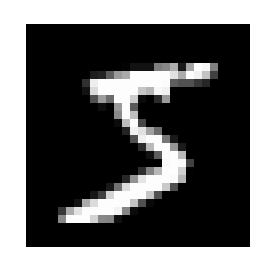

In [32]:
plt.matshow(X_2[0,:].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

## X normalized

In [33]:
file_name = "X_normalized"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))

N=1000	D=784
N=1000	D=784


In [34]:
diff = np.abs(X_1 - X_2)

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd: {diff.std()}")

Max diff: 0.0
Min diff: 0.0
Std: 0.0


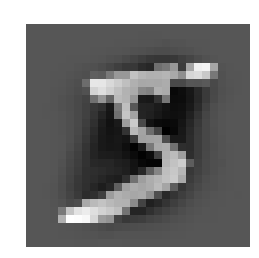

In [35]:
plt.matshow(X_2[0,:].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

## Pairwise affinities $P_{i|j}$

In [36]:
file_name = "P"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))

N=1000	D=1000
N=1000	D=1000


In [37]:
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {re.max()}\nMin diff: {re.min()}\nStd: {re.std()}")

Max diff: 0.0
Min diff: 0.0
Std: 0.0


In [38]:
print(X_2)

[[  6.24821450e-305   1.52582712e-004   4.40338250e-007 ...,
    2.88341935e-006   8.28401164e-006   8.24248241e-006]
 [  4.83335112e-004   1.58679926e-308   1.51239456e-005 ...,
    9.23376601e-004   3.55764945e-004   2.53750179e-005]
 [  3.35159517e-006   5.74543722e-007   1.34447823e-305 ...,
    6.32595748e-006   2.05830026e-005   6.29258688e-005]
 ..., 
 [  9.53562172e-005   1.07268418e-003   5.78789803e-005 ...,
    2.07203366e-308   2.69978271e-005   8.96465635e-004]
 [  1.05061161e-004   3.58387415e-004   6.81803365e-005 ...,
    1.20725832e-005   1.26829181e-307   1.95058719e-004]
 [  4.96658568e-005   7.23972132e-006   6.55534042e-005 ...,
    3.69299246e-004   8.71188160e-005   2.11351894e-308]]


## Symmetric affinities $P_{ij}$

In [39]:
file_name = "P_sym"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))

N=1000	D=1000
N=1000	D=1000


In [49]:
diff = np.abs(X_1 - X_2)
assert not np.any(np.isnan(X_1))
assert not np.any(np.isnan(X_2))

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd: {diff.std()}")

Max diff: 0.0
Min diff: 0.0
Std: 0.0


## Low dimensional affinities $Q_{ij}$

In [50]:
file_name = "Q_0"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
assert not np.any(np.isnan(X_1))
assert not np.any(np.isnan(X_2))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=1000
N=1000	D=1000
Max diff: 4.2802955591003666e-07
Min diff: 0.0
Std diff: 3.9507874252386045e-08

Max relative error: 4.2802955591003666e-07
Min relative error: 0.0
Std relative error: 3.9507874252386045e-08


In [51]:
file_name = "Q_300"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
assert not np.any(np.isnan(X_1))
assert not np.any(np.isnan(X_2))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=1000
N=1000	D=1000
Max diff: 3.504529999531769e-12
Min diff: 0.0
Std diff: 2.994292570633578e-13

Max relative error: 3.504529999531769e-12
Min relative error: 0.0
Std relative error: 2.994292570633578e-13


## Gradients $\frac{dC}{d\mathcal{Y}}$

In [52]:
file_name = "dC_0"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
assert not np.any(np.isnan(X_1))
assert not np.any(np.isnan(X_2))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

FileNotFoundError: [Errno 2] No such file or directory: '../implementations/original/datum/dC_0'

In [54]:
file_name = "dC_300"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
assert not np.any(np.isnan(X_1))
assert not np.any(np.isnan(X_2))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=2
N=1000	D=2
Max diff: 9.497611688383577e-10
Min diff: 3.128957258703107e-14
Std diff: 1.3294869535028852e-10

Max relative error: 9.497611688383577e-10
Min relative error: 3.128957258703107e-14
Std relative error: 1.3294869535028852e-10


## Output Embedding $\mathcal{Y}$

In [55]:
file_name = "Y_0"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=2
N=1000	D=2
Max diff: 0.0012382185750860783
Min diff: 1.430077980801224e-08
Std diff: 0.00018109633930966237

Max relative error: 0.0012382185750860783
Min relative error: 1.430077980801224e-08
Std relative error: 0.00018109633930966237


In [56]:
file_name = "Y_0_normalized"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=2
N=1000	D=2
Max diff: 0.001245202005563082
Min diff: 1.3511796938847393e-07
Std diff: 0.00018104555033411285

Max relative error: 0.001245202005563082
Min relative error: 1.3511796938847393e-07
Std relative error: 0.00018104555033411285


In [58]:
file_name = "Y_300"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=2
N=1000	D=2
Max diff: 4.0533617243148986e-06
Min diff: 1.5242734763666893e-10
Std diff: 5.143516072383088e-07

Max relative error: 4.0533617243148986e-06
Min relative error: 1.5242734763666893e-10
Std relative error: 5.143516072383088e-07


In [57]:
file_name = "Y_300_normalized"

X_1 = read_results(os.path.join("../implementations/original", "datum", file_name))
X_2 = read_results(os.path.join("../implementations/tsne_exact_optimizations", "datum", file_name))
diff = np.abs(X_1 - X_2)
re = diff / max(X_1.max(), X_2.max())

print(f"Max diff: {diff.max()}\nMin diff: {diff.min()}\nStd diff: {diff.std()}\n")
print(f"Max relative error: {diff.max()}\nMin relative error: {diff.min()}\nStd relative error: {diff.std()}")

N=1000	D=2
N=1000	D=2
Max diff: 4.052686322730439e-06
Min diff: 6.618787393569977e-10
Std diff: 5.140223577919975e-07

Max relative error: 4.052686322730439e-06
Min relative error: 6.618787393569977e-10
Std relative error: 5.140223577919975e-07
